In [67]:
import sklearn.datasets
import umap
import umap.plot
import pickle
import numpy as np

print("Loading data...")
data = np.load('data.npy')
print("Loaded data of shape {}".format(data.shape))

Loading data...
Loaded data of shape (262144, 300)


In [93]:
print("Embedding into two dimensions using umap...")
embedding = umap.UMAP().fit(data)
print("Embedding complete.")

Embedding into two dimensions using umap...
Embedding complete.


In [29]:
average_diffs = np.array([np.diff(x.reshape((1, 300)), axis=1).mean() for x in data])

<Axes: >

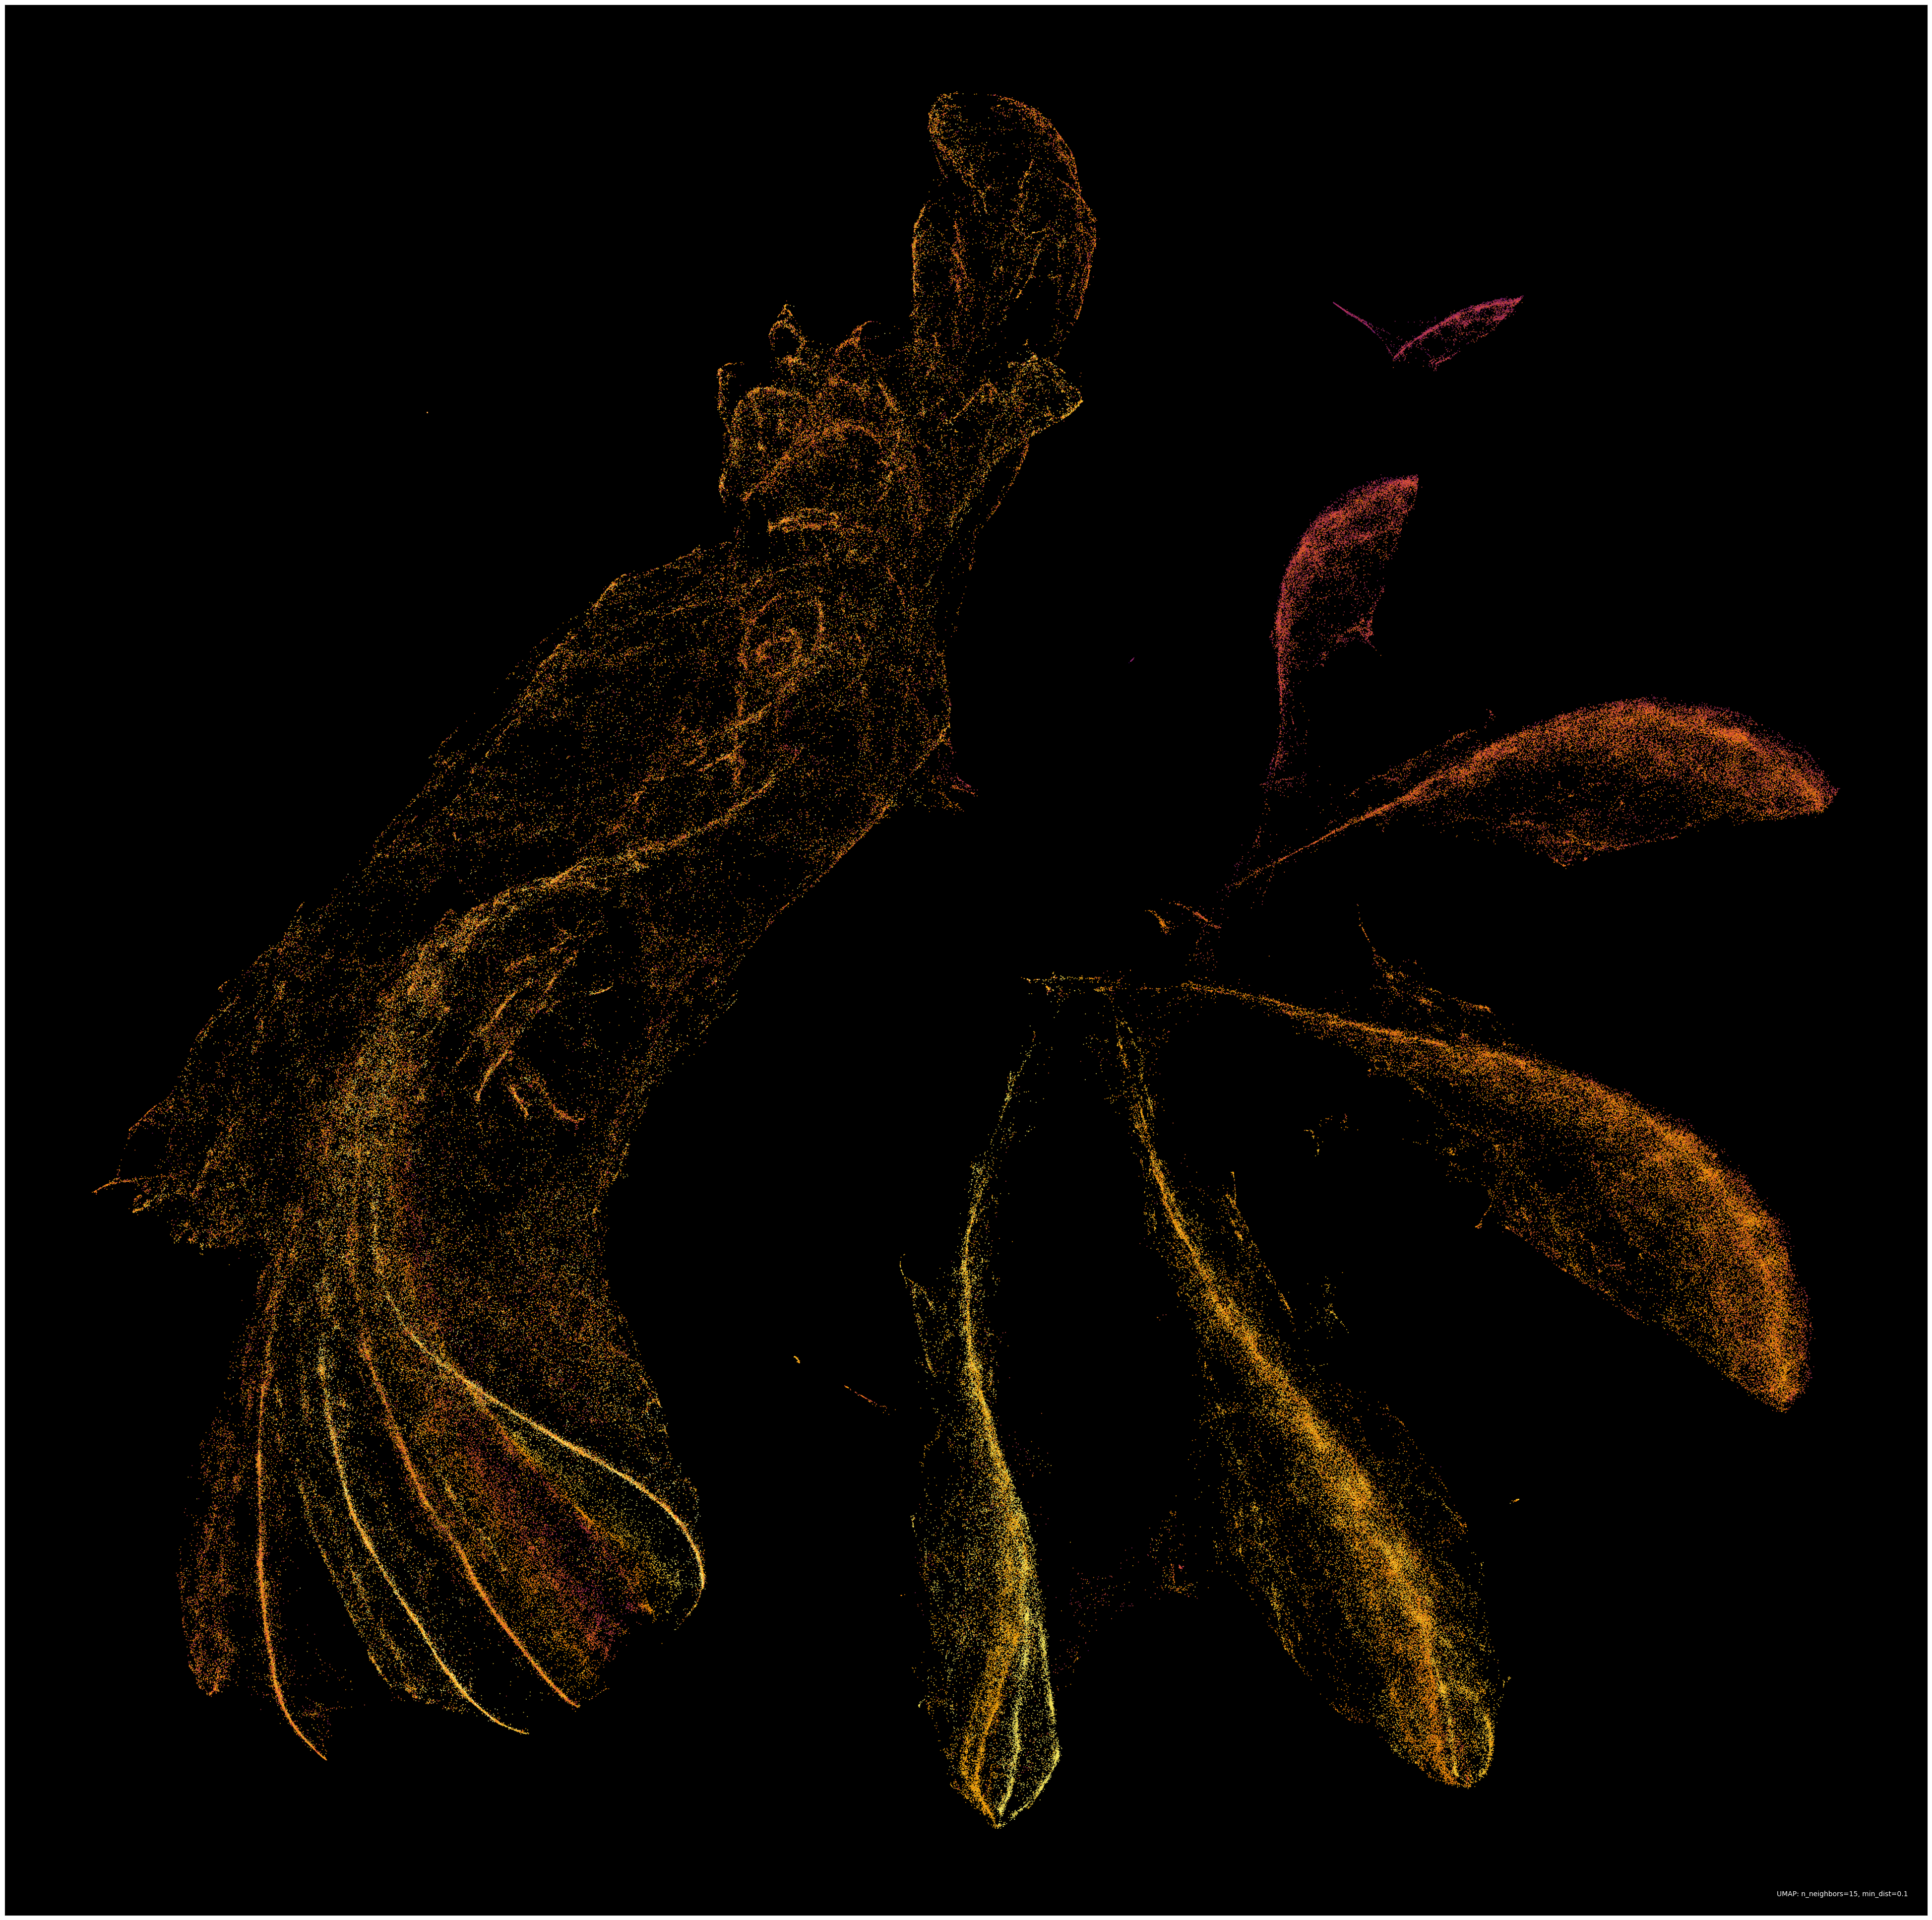

In [92]:
umap.plot.points(
     embedding,
     values=average_diffs,
     theme='inferno',
     width=5000,
     height=5000,
)

In [42]:
np.save("embedding.npy", embedding.embedding_)
np.save("average_diffs.npy", average_diffs)

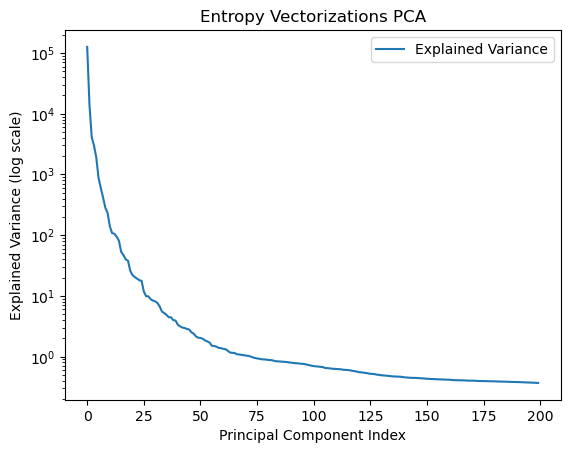

In [51]:
from sklearn.decomposition import PCA


plt.plot(PCA(n_components=200).fit(data).explained_variance_, label='Explained Variance')
plt.yscale('log')  # Set the y-axis to a logarithmic scale
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance (log scale)')
plt.title('Entropy Vectorizations PCA')
plt.legend()
plt.show()

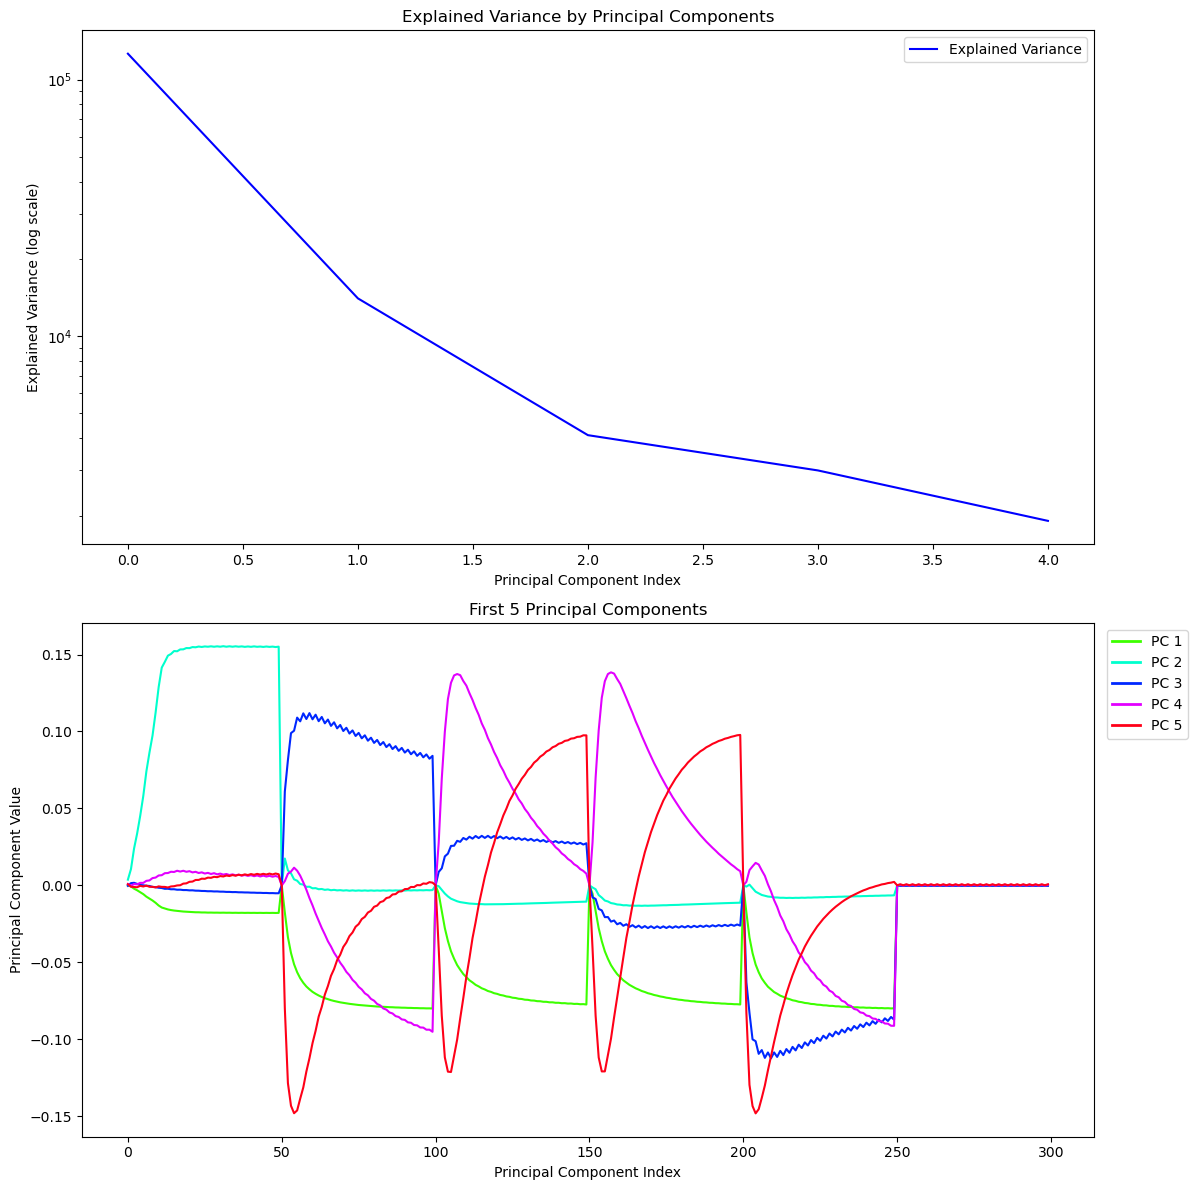

In [52]:
# Assume 'data' is already defined and properly preprocessed

# Fit PCA
num_components = 5
pca = PCA(n_components=min(num_components, data.shape[0], data.shape[1]))
pca.fit(data)

# Create a plotting color map
colors = plt.cm.hsv(np.linspace(0.3, 1, num_components))

# Create a subplot grid of 2 rows and 1 column
fig, ax = plt.subplots(2, 1, figsize=(12, 12))  # Adjust the figure size as needed

# First subplot for explained variance
ax[0].plot(pca.explained_variance_, label='Explained Variance', color='blue')
ax[0].set_yscale('log')
ax[0].set_xlabel('Principal Component Index')
ax[0].set_ylabel('Explained Variance (log scale)')
ax[0].set_title('Explained Variance by Principal Components')
ax[0].legend()

# Second subplot for the first 20 principal component vectors
for i in range(num_components):
    ax[1].plot(pca.components_[i], label=f'PC {i+1}', color=colors[i])
ax[1].set_xlabel('Principal Component Index')
ax[1].set_ylabel('Principal Component Value')
ax[1].set_title('First 5 Principal Components')

# Create a custom legend for the second subplot
custom_lines = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(num_components)]
ax[1].legend(custom_lines, [f'PC {i+1}' for i in range(num_components)], loc='upper right', bbox_to_anchor=(1.1, 1))

# Adjust layout to prevent the subplots from overlapping
plt.tight_layout()

# Display the plots
plt.show()

In [85]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.graph_objs as go

# Perform PCA on the dataset
pca = PCA(n_components=5)  # We calculate at least 3 components to make sure components_ is populated
pca.fit(data)

def show_component(n, name):
    # Get the first principal component
    first_pc = pca.components_[n]

    # Reshape this first principal component into the 5x60 2D structure
    first_pc_reshaped = first_pc.reshape((6, 50))

    # Prepare data for 3D surface plot using plotly
    x = np.arange(60)
    y = np.arange(5)
    X, Y = np.meshgrid(x, y)
    Z = first_pc_reshaped

    # Plotly 3D Surface plot
    fig = go.Figure(data=[go.Surface(z=Z)])
    fig.update_layout(
        title=name+' Principal Component',
        width=700,
        height=700,
        margin=dict(l=65, r=50, b=65, t=90)
    )
    fig.show()

In [86]:
show_component(0, 'First')

In [87]:
show_component(1, 'Second')

In [88]:
show_component(2, 'Third')

In [89]:
show_component(3, 'Fourth')

In [90]:
show_component(4, 'Fifth')